Link Dataset : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Nama : Rezanda Weda Hanantya

NIM  : 22.11.4715

# Import library

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Set matplotlib untuk menampilkan plot di notebook
%matplotlib inline

# Optional: Set tema seaborn (opsional)
sns.set_theme()

# Pengumpulan Data

In [3]:
# Load dataset
dataset_path = '/content/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(dataset_path)

In [4]:
# Tampilkan 10 baris pertama
print("10 Baris Pertama Dataset:")
print(data.head(10))

10 Baris Pertama Dataset:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   


In [5]:
# Ukuran data
print("\nUkuran Dataset:", data.shape)


Ukuran Dataset: (299, 13)


In [6]:
# Informasi data
print("\nInformasi Dataset:")
data.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 K

# Data Preprocessing

In [7]:
# Handling missing values
print("\nJumlah Missing Values Sebelum Penanganan:")
print(data.isnull().sum())
data.fillna(data.median(numeric_only=True), inplace=True)  # Mengisi nilai numerik yang hilang dengan median


Jumlah Missing Values Sebelum Penanganan:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [8]:
# Jumlah duplikasi
duplicates = data.duplicated().sum()
print("\nJumlah Duplikasi:", duplicates)
data.drop_duplicates(inplace=True)


Jumlah Duplikasi: 0


In [10]:
# Melakukan encoding data
data['diabetes'] = data['diabetes'].map({'M': 0, 'F': 1})
data['sex'] = data['sex'].map({'N': 0, 'Y': 1})
data['smoking'] = data['smoking'].map({'Flat': 0, 'Up': 1})
data['platelets'] = data['platelets'].map({'TA': 0, 'ATA': 1,'NAP': 2, 'ASY': 3 })
data['time'] = data['time'].map({'Normal': 0, 'ST': 1})

In [11]:
# Tampilkan 10 baris pertama setelah perubahan
print("\n10 Baris Pertama Setelah Perubahan:")
print(data.head(10))


10 Baris Pertama Setelah Perubahan:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582       NaN                 20   
1  55.0        0                      7861       NaN                 38   
2  65.0        0                       146       NaN                 20   
3  50.0        1                       111       NaN                 20   
4  65.0        1                       160       NaN                 20   
5  90.0        1                        47       NaN                 40   
6  75.0        1                       246       NaN                 15   
7  60.0        1                       315       NaN                 60   
8  65.0        0                       157       NaN                 65   
9  80.0        1                       123       NaN                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1        NaN               1.9           1

In [12]:
# Informasi data setelah konversi
print("\nInformasi Dataset Setelah Konversi:")
data.info()


Informasi Dataset Setelah Konversi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  0 non-null      float64
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 0 non-null      float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       0 non-null      float64
 10  smoking                   0 non-null      float64
 11  time                      0 non-null      float64
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(7), int64(6)
memo

# Exploratory Data Analysis

In [13]:
# Visualisasi distribusi fitur numerik
numerical_cols = data.select_dtypes(include=[np.number]).columns
print("\nFitur Numerik:", list(numerical_cols))



Fitur Numerik: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


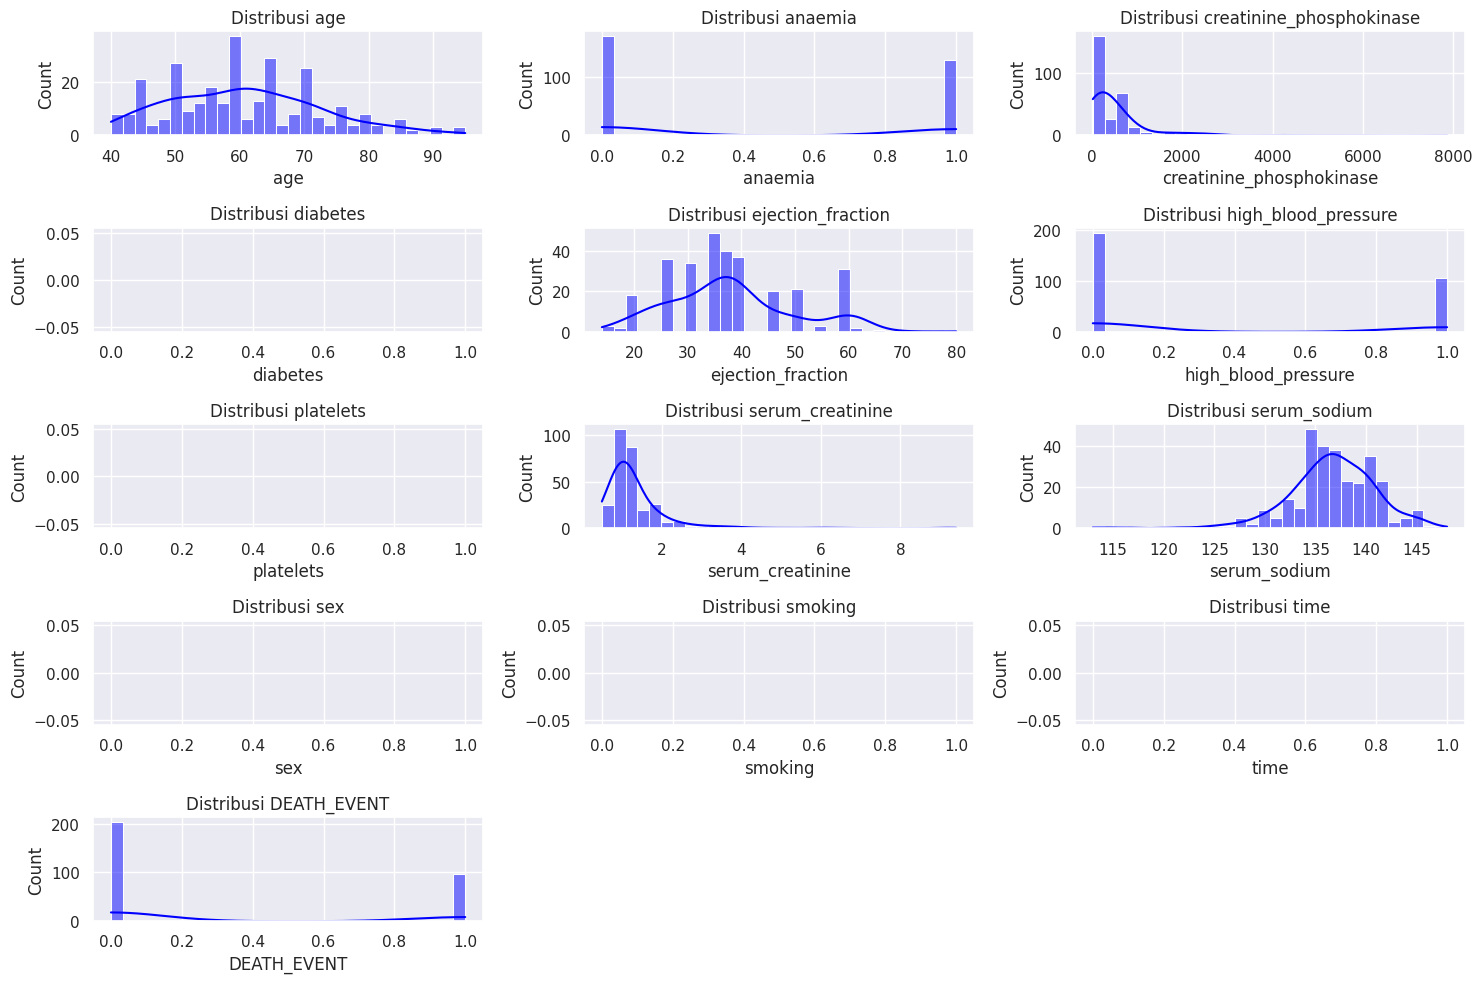

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

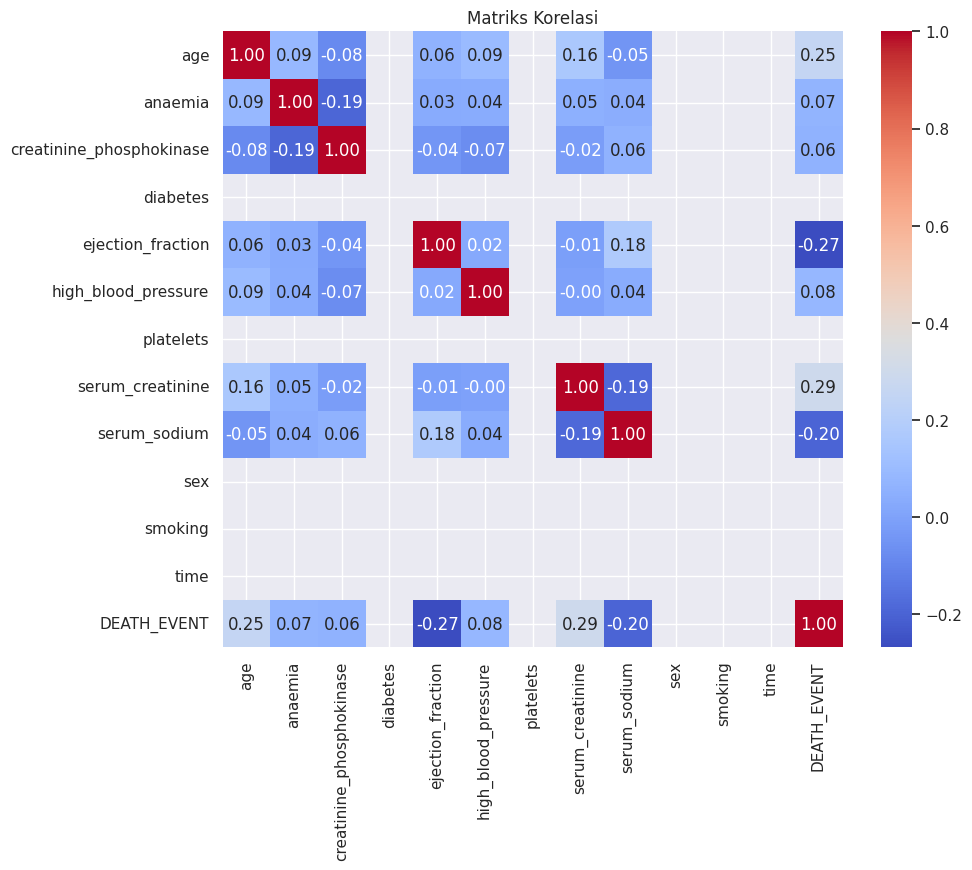

In [15]:
# Analisis Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

# Seleksi Fitur

In [24]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('age', axis=1)
y = data['age']

In [25]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 12)
(90, 12)
(209,)
(90,)


In [27]:
# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

In [28]:
# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['diabetes' 'platelets' 'sex' 'smoking' 'time']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['diabetes' 'platelets' 'sex' 'smoking' 'time']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


# Modeling

In [22]:
# Inisialisasi model Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
# Melatih model pada data pelatihan
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Melakukan prediksi pada data uji
y_pred = gbm_model.predict(X_test)

In [ ]:
# Mengukur akurasi model
accuracy_gbm = accuracy_score(y_test, y_pred)

In [ ]:
# Confusion matrix
cmr = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cm_labels = [f"{label}\n{value}" for label, value in zip(labels, cmr.flatten())]
cm_labels = np.array(cm_labels).reshape(2, 2)

In [ ]:
class_report = classification_report(y_test, y_pred)

In [ ]:
print('\nConfusion Matrix:')
print(cmr)


Confusion Matrix:
[[ 99  13]
 [ 24 140]]


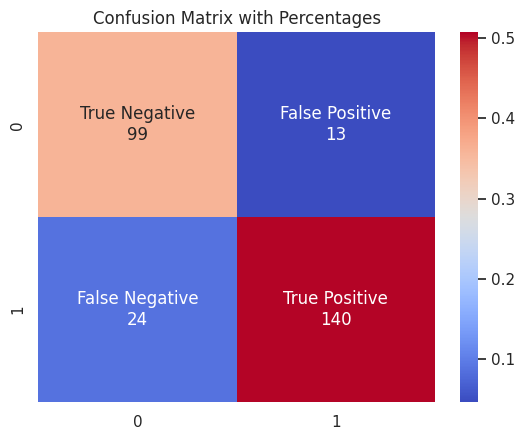

In [ ]:
# Plot confusion matrix
sns.heatmap(cmr / np.sum(cmr), annot=cm_labels, fmt='', cmap='coolwarm', annot_kws={'size': 12})
plt.title('Confusion Matrix with Percentages')
plt.show()

# Evaluasi Model

In [ ]:
print("Accuracy (GBM):", accuracy_gbm)

Accuracy (GBM): 0.8659420289855072


In [ ]:
# Menampilkan informasi klasifikasi
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

